# Visual Storytelling Report: _California vs. France, A Showdown to Settle the Worlds Best Winemaker_

**November 15th, 2018** <br>
**Austin Jarvis** 

In [1]:
from IPython.display import HTML , YouTubeVideo ,  Image
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Abstract

The age old question, who grows the best grapes? Of course, as adults the interest is in what happens to those grapes after fermentation. The history of wineries date back over 6,000 years, but the focus of our interest lies in a far more recent rivalry. California vs. France has emerged as the primary competition for the best wine in the world. The data initially came reviews posted on the WineEnthusiast website and produced almost 130,000 observations of data, a sufficient amount to picture the landscape of the wine industry. In addition to the WineEnthusiast data, observations from throughout history are referenced, such as the Paris Wine Tasting of 1976. This story aims to remove the bias that European, specifically French, wine is superior to California's. 



## Persuasive Statement

California wines are superior to French wines

## Paris Wine Tasting of 1976

Also known as the Judgement of Paris, this event was a competition of both white and red wines, taking place in Paris on May 24th 1976. French judges conducted two blind tasting comparisons, one for the white wine Chardonnay, and the other for a red wine, Bordeaux(France) and Cabernet Sauvignon(California). In a very surprising result California wines rated highest in both the red and white categories. 

The tasting was disputed by French winemakers as not being repeatable or that the French wines would age better, the tasting was re-conducted 30 years later and the results were more favorable than the 1976 tasting for the United States. The top five rated wines were all from the United States in the 2006 tasting.

Although the French reported to not take the results seriously, they banned the British organizer of the tasting and began to reevaluate traditions in there winemaking processes. The tasting also gave hope to winemakers across the world that France was not the only place great wine could be produced. In hindsight the tasting was benificial for France as well and has pushed the industry to develop excellent wine.

The following clip, from the movie Bottle Shock, depicts the blind tasting taking place in 1976. 

In [2]:
import warnings
warnings.filterwarnings('ignore') 
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns
import statsmodels.api as sm

from matplotlib.offsetbox import OffsetImage,AnnotationBbox

sns.set_style("darkgrid")
sns.set_context("poster")
sns.set(rc={'figure.figsize':(12.0, 8.0)})
rcParams['figure.figsize'] = (12.0, 8.0)

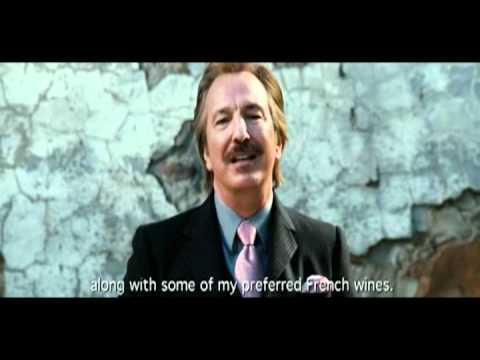

In [3]:
YouTubeVideo('zGM0O15Iw5Q',width=800, height=600,start=155,end=205)

The following are the judges results from the tasting:

![Image](https://static1.squarespace.com/static/55936452e4b0d62d66a71a2e/55936640e4b001dc7d7ba06b/55936642e4b001dc7d7ba342/1498098323097/Judgement+of+Paris+Grades+Red+Wines)
<center>Red Wine Results 1976</center><br>

![Image](https://static1.squarespace.com/static/55936452e4b0d62d66a71a2e/55936640e4b001dc7d7ba06b/55936642e4b001dc7d7ba343/1498098360758/Judgement+of+Paris+Grades+white+Wines)
<center>White Wine Results 1976</center><br>

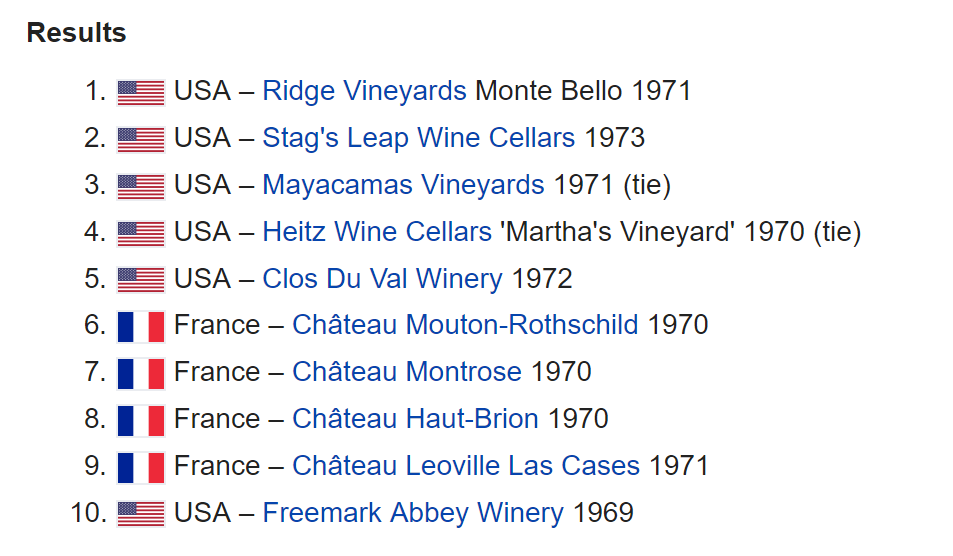

In [4]:
Image("2006ParisTasting.png")

<center>Red Wine Results 2006</center><br>

## How are wines scored?

Competition in an food industry can be difficult due to quality being determined off of flavor, however, the wine industry developed a point system to classify wines. Below is a the scale on which the wines are scored:

- 95-100 Classic: a great wine<br>
- 90-94 Outstanding: a wine of superior character and style<br>
- 85-89 Very good: a wine with special qualities<br>
- 80-84 Good: a solid, well-made wine<br>
- 75-79 Mediocre: a drinkable wine that may have minor flaws<br>
- 50-74 Not recommended<br>

Although these scores are important and a good way to understand the quality of the wine, not all prefer the same taste in wine and this analyis may not hold true for all. 

In [16]:
# Apologies I changed this from HW2, I did not realize the first150k.csv was the version 1 and the 130k-v2 was the version 2 
# my initial understanding was they were seperate observations. In the future I should factor in duplicates into the data cleaning
# to catch this.


#df1 = pd.read_csv('winemag-data_first150k.csv')
df = pd.read_csv('winemag-data-130k-v2.csv')
#df = pd.concat([df1,df2])
df.head()
#print(df.shape)
#df.dtypes
#print(df.describe())

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [19]:
df.loc[(df['price'] == df['points']) & (df['province']=='California')]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
236,236,US,"Shows rich, firm mountain tannins and well-rip...",Kiss Ridge Vineyard,85,85.0,California,Diamond Mountain District,Napa,NaN,NaN,Meeker 2004 Kiss Ridge Vineyard Cabernet Sauvi...,Cabernet Sauvignon,Meeker
4466,4466,US,"Very dark in color, this jumps out at first be...",Reserve,85,85.0,California,Livermore Valley,Central Coast,Virginie Boone,@vboone,Rigg Estate Vineyards 2006 Reserve Cabernet Sa...,Cabernet Sauvignon,Rigg Estate Vineyards
9115,9115,US,From the rocky Stagecoach Vineyard atop Atlas ...,Stagecoach Vineyard,90,90.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Sequoia Grove 2010 Stagecoach Vineyard Caberne...,Cabernet Sauvignon,Sequoia Grove
9630,9630,US,There's a heaviness to this 76% Cab blended wi...,Stagecoach Vineyard,85,85.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Krupp Brothers 2009 Stagecoach Vineyard Cabern...,Cabernet Sauvignon,Krupp Brothers
11642,11642,US,"Made from a majority of 8% Merlot, the remaind...",Red,85,85.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Vellum 2013 Red Merlot-Cabernet Sauvignon (Nap...,Merlot-Cabernet Sauvignon,Vellum
18080,18080,US,"Tonella has 16% Merlot within, from the estate...",Tonella Vineyard,90,90.0,California,Rutherford,Napa,Virginie Boone,@vboone,Sequoia Grove 2012 Tonella Vineyard Cabernet S...,Cabernet Sauvignon,Sequoia Grove
22684,22684,US,A handful of Cabernet Franc is included in thi...,Stagecoach Vineyard,90,90.0,California,Atlas Peak,Napa,Virginie Boone,@vboone,Sequoia Grove 2012 Stagecoach Vineyard Caberne...,Cabernet Sauvignon,Sequoia Grove
24851,24851,US,This blends 75% Cabernet Sauvignon with 25% Pe...,Blend 26,90,90.0,California,Napa Valley,Napa,Virginie Boone,@vboone,B Cellars 2013 Blend 26 Cabernet Sauvignon (Na...,Cabernet Sauvignon,B Cellars
24954,24954,US,"Tightly woven and deeply concentrated, this br...",Monte Rosso Vineyard,90,90.0,California,Sonoma Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2013 Monte Rosso Vineyard Cab...,Cabernet Sauvignon,Louis M. Martini
38356,38356,US,This 100% varietal wine from the powerful appe...,NaN,90,90.0,California,Stags Leap District,Napa,Virginie Boone,@vboone,Martin Ray 2014 Cabernet Sauvignon (Stags Leap...,Cabernet Sauvignon,Martin Ray


In [12]:
df['new'] = (df['price'] > df['points'])
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,new
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,False
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,False
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,False
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,False
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,False


In [6]:
CaliforniaVsFrenchWine = df[(df['country'].isin(['France'])) | (df['province'].isin(['California']))]
CaliforniaVsFrenchWine['vintage'] = CaliforniaVsFrenchWine.title.str.extract('(\d+)')
#print(CaliforniaVsFrenchWine.head())

## Significantly More California Wines Reviewed

This report will focus on what factors make California wines superior to French wines. 

The earlier video and results from the Paris Wine Tasting of 1976, provided real life tests of California wines rating higher than French wines. Now we will focus on the data of the WineEnthusiast reviews, the large sample size of the data yields further proof of the validity of the results.

First, the number of reviewed wines is looked at, California has significantly more reviewed wines. Approximately 37,000 wines from California wines were reviewed versus approximately 22,000 French wines. Although a count of reviewed wines may seem insignificant, the large difference provides evidence California is producing more wine worth reviewing.

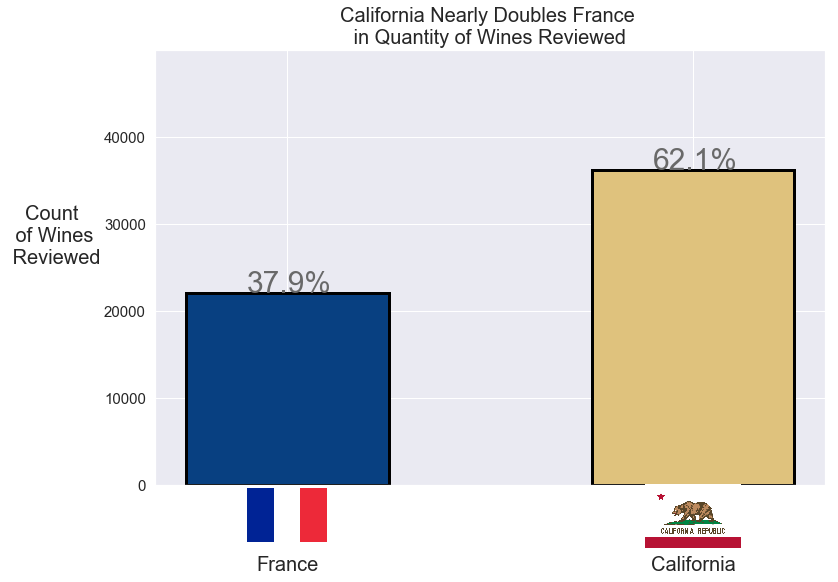

In [7]:

def get_flag(name):
    path = "flags/{}.png".format(name.title())
    im = plt.imread(path)
    return im

def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.08)
    im.image.axes = ax

    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -31.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)


countries = ["France", "California"]
valuesA = CaliforniaVsFrenchWine.groupby('country')['country'].count()

fig, ax = plt.subplots()

ax.bar(range(len(countries)), valuesA, width=0.5,align="center",edgecolor='black',linewidth=3, color=('#084081','#dfc27d'))

ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries)
ax.tick_params(axis='x', which='major', pad=65)
plt.yticks(np.arange(0,50000,step=10000),fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel("Count \n of Wines \n Reviewed",rotation=0,fontsize=20,labelpad=50)
plt.title("California Nearly Doubles France \n in Quantity of Wines Reviewed ",fontsize=20)
plt.ylim(0,50000)


totals = []


for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.15, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 1))+'%', fontsize=30,
                color='dimgrey')
    
for i, c in enumerate(countries):
    offset_image(i, c, ax)

plt.show()

## Quality Increases with Price, but at What Rate?

It could have been predicted with high confidence that as the point ratings increase so would the price of the wine. This holds true for both the California and French wines, however as seen below in the average price values, the value of the California wine is better. Looking at wines that scored 90 points or higher, the average price of California wine is \$15 cheaper creatign a better value. Additionally looking at wines that scored 95 points or higher, the average price of California wine is $140 cheaper, a signicantly better value. So for wines that scores within the same range, California wines prooved to be the smart purchase.

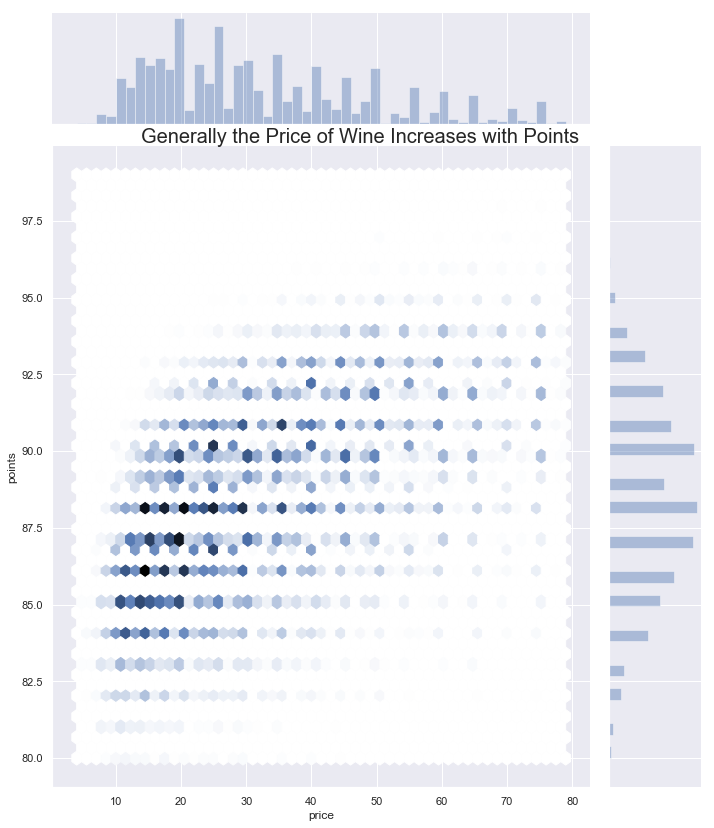

In [8]:
g=sns.jointplot(x='price', y='points', data=CaliforniaVsFrenchWine[CaliforniaVsFrenchWine['price']<80],kind='hex',size=10)
plt.subplots_adjust(top=1.14)
g.fig.suptitle('Generally the Price of Wine Increases with Points',fontsize=20) # can also get the figure from plt.gcf()
#plt.title("Generally the Price of Wine Increases with Score ",fontsize=20)

In [9]:
print('Average price for a 90 point or higher Wine in California is $',round(CaliforniaVsFrenchWine[(CaliforniaVsFrenchWine['country'] == 'US')& (CaliforniaVsFrenchWine['points'] >= 90)]['price'].mean(),2))
print('Average price for a 90 point or higher Wine in France is $',round(CaliforniaVsFrenchWine[(CaliforniaVsFrenchWine['country'] == 'France')& (CaliforniaVsFrenchWine['points'] >= 90)]['price'].mean(),2))



print('\nAverage price for a 95 point or higher Wine in California is $',round(CaliforniaVsFrenchWine[(CaliforniaVsFrenchWine['country'] == 'US')& (CaliforniaVsFrenchWine['points'] >= 95)]['price'].mean(),2))
print('Average price for a 95 point or higher Wine in France is $',round(CaliforniaVsFrenchWine[(CaliforniaVsFrenchWine['country'] == 'France')& (CaliforniaVsFrenchWine['points'] >= 95)]['price'].mean(),2))

Average price for a 90 point or higher Wine in California is $ 51.74
Average price for a 90 point or higher Wine in France is $ 66.84

Average price for a 95 point or higher Wine in California is $ 93.75
Average price for a 95 point or higher Wine in France is $ 233.12


In [10]:
common_vintage = CaliforniaVsFrenchWine[CaliforniaVsFrenchWine.groupby("vintage")["vintage"].transform('size')>2000]

## California Wines Rate Higher in Recent Vintages

The competition between California and France is so close that a single vintage can flip the scales and return the coveted best wine in the world title. Although California has been in close competition with France since the 1970's, the following figure shows how the points rating of California wines has continualy gained on France. The results of wines produced in the last four years shows California wines score higher. 

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

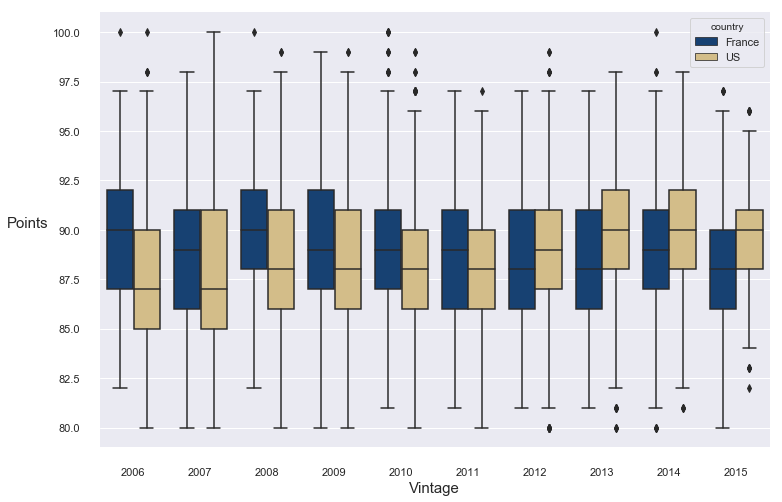

In [20]:
g= sns.boxplot('vintage', 'points', hue='country', data=common_vintage,palette = ('#084081','#dfc27d'))
sns.despine(offset=10, trim=True)
plt.ylabel("Points", rotation = 0,horizontalalignment='right',fontsize=15)
plt.xlabel("Vintage",fontsize=15)
plt.legend([common_vintage.country],['France','California'])
plt.title("California Scores Better in Recent Years",fontsize=20)

## California Scores Better on 3 of 4 Most Reviewed Varieties

To become the worlds best wine producer, you must produce serveral different varieties at a high level. Many countries have mastered a single variety, few have mastered multiple like California and France. The top 4 most reviewed wine varieties were examined and California scored higher than France in three of them. The one variety California did not score higher in, Chardonnay, was one of the varieties tested in the Paris Tasting. A Califonia Chardonnay recieved first place in the white wine tasting proving California is capable of producing better Chardonnay than France, and therefore could score better in all four of the most reviewed wines. 

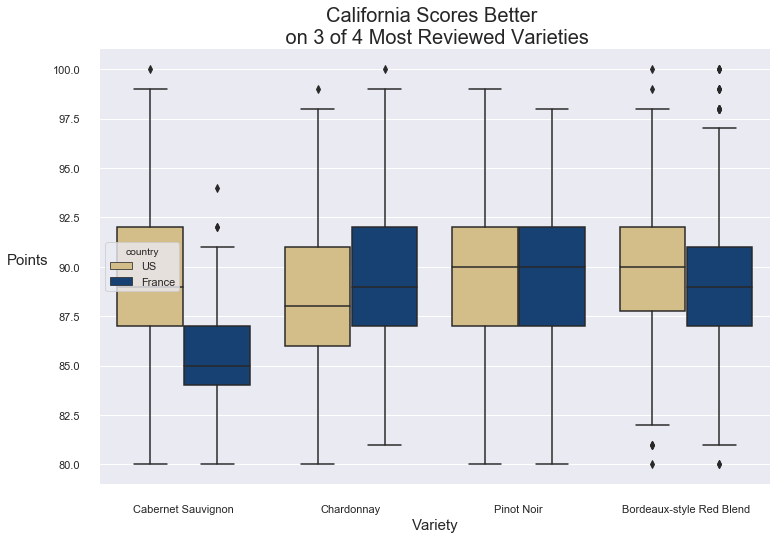

In [12]:
common_variety = CaliforniaVsFrenchWine[CaliforniaVsFrenchWine.groupby("variety")["variety"].transform('size')>4000]
sns.boxplot('variety', 'points', hue='country', data=common_variety,palette = ('#dfc27d','#084081'))
sns.despine(offset=10, trim=True)
plt.ylabel("Points", rotation = 0,horizontalalignment='right',fontsize=15)
plt.xlabel("Variety",fontsize=15)
plt.title("California Scores Better \n on 3 of 4 Most Reviewed Varieties",fontsize=20)

## Conclusion

While the wine industry is complicated and tough to evaluate, the points scale has made it easier to distinguish the quality of the wine. California has been underestimated for years and though of as a second thought or new school wine, however California producers have proved over the last 40 years they are a serious competitor. The Paris Tasting introduced California wines to the world and the recent data shows the abundance of California wine being reviewed, the high ratings in recent years and the high ratings in the most popular wine varieties. Although France has a long history as the worlds best wine producer it is clear California wines have dethroned France's. 